In [1]:
import re
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

C:\Users\dongy\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv(r'C:\Users\dongy\Sentiment Analysis on Movie Reviews\dataset\train.tsv', sep='\t')
df_test = pd.read_csv(r'C:\Users\dongy\Sentiment Analysis on Movie Reviews\dataset\test.tsv', sep='\t')

In [4]:
stop_word = set(stopwords.words('english')) 
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word', min_df=0.001)
sparse_matrix = word_vectorizer.fit_transform(df_test['Phrase'])
frequencies = sum(sparse_matrix).toarray()[0]
freq = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
freq.sort_values('frequency', ascending=False)

,frequency
the,20181
and,12594
of,12508
to,9142
in,5658
is,5322
it,4857
that,4531
as,3366
with,2972


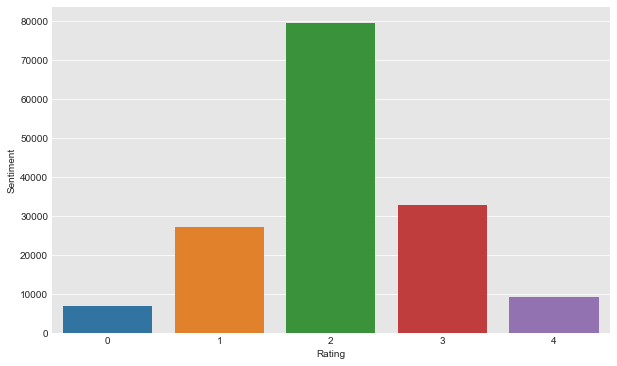

In [5]:
#Visualization of data set
a = df_train.Sentiment.value_counts()
a = pd.DataFrame(a)
a['Rating'] = a.index
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y='Sentiment', x='Rating', data=a)

In [6]:
#we make text lower case and leave only letters from a-z and digits
df_train['Phrase'] = df_train['Phrase'].str.lower()
df_train['Phrase'] = df_train['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df_test['Phrase'] = df_test['Phrase'].str.lower()
df_test['Phrase'] = df_test['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [7]:
X_train = df_train.Phrase
y_train = df_train.Sentiment
tokenize = Tokenizer()
tokenize.fit_on_texts(X_train.values)
X_test = df_test.Phrase
X_train = tokenize.texts_to_sequences(X_train)
X_test = tokenize.texts_to_sequences(X_test)
max_lenght = max([len(s.split()) for s in df_train['Phrase']])
X_train = pad_sequences(X_train, max_lenght)
X_test = pad_sequences(X_test, max_lenght)
print(X_train.shape)
print(X_test.shape)

(156060, 48)
(66292, 48)


In [8]:
#I choose to build 3 hidden layers
EMBEDDING_DIM = 100
unknown = len(tokenize.word_index)+1
model = Sequential()
model.add(Embedding(unknown, EMBEDDING_DIM, input_length=max_lenght))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2 ))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 48, 100)           1637800   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 1,755,693
Trainable params: 1,755,693
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
print(y_train.shape)
print(X_train.shape)
type(X_train)
type(y_train)
y_train = y_train.as_matrix()

(156060,)
(156060, 48)


numpy.ndarray

pandas.core.series.Series

In [11]:
type(y_train)
y_train.shape
X_train.shape

numpy.ndarray

(156060,)

(156060, 48)

In [12]:
model.fit(X_train, y_train, batch_size=128, epochs=7, verbose=1)

Train on 156060 samples
Epoch 1/7
   128/156060 [..............................] - ETA: 34:19

InternalError: 2 root error(s) found.
  (0) Internal:  Blas GEMM launch failed : a.shape=(128, 128), b.shape=(128, 512), m=128, n=512, k=128
	 [[{{node sequential/lstm/while/body/_1/MatMul_1}}]]
	 [[Reshape_6/_34]]
  (1) Internal:  Blas GEMM launch failed : a.shape=(128, 128), b.shape=(128, 512), m=128, n=512, k=128
	 [[{{node sequential/lstm/while/body/_1/MatMul_1}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_distributed_function_2912]

Function call stack:
distributed_function -> distributed_function


In [2]:
import jieba

In [10]:
text = '夏阳街道外青松公路6999弄仁恒运杰河滨花园118#801'
text_cut = jieba.cut(text, cut_all=False)
print('/'.join(text_cut))

夏阳/街道/外/青松/公路/6999/弄仁恒/运杰/河滨/花园/118/#/801
